In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import math

In [3]:
##loading data for Z34C (300K)
#tica_data = np.load('proj14124_tica_lag_10_comp_4.npy', allow_pickle=True)    #tic_1,2,3,4
#tica_data = np.concatenate(tica_data)
tIC_1 = np.load('tIC_1.npy')
tIC_2 = np.load('tIC_2.npy')

ass = np.load('ass_clusters_100_lag_10_comp_4.npy', allow_pickle=True)
ass = np.concatenate(ass)
print (len(tIC_1), len(ass))
clusters = np.load('cluster_centers_100_lag_10_comp_4.npy', allow_pickle=True)
print ('clusters.shape=', clusters.shape)
unperturbed_pops = np.load('unperturbed_pops.npy')

1127900 1127900
clusters.shape= (100, 4)


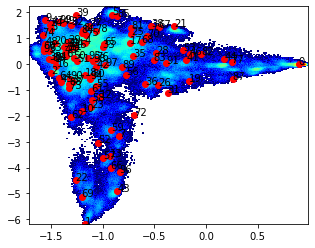

In [4]:
##plotting tic_1 vs tic_2
plt.figure(figsize=(5,4))
plt.hist2d(tIC_1, tIC_2, bins=300, norm=LogNorm(),cmap=cm.jet)

for i in range(len(clusters)):
    plt.scatter(clusters[:,0][i], clusters[:,1][i], color='r')
    plt.text(clusters[:,0][i], clusters[:,1][i], i, color='k')

density.shape= (100, 100)
(100, 100)


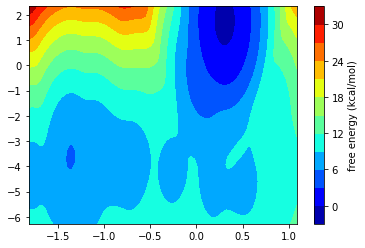

In [5]:
# 2D kernel density contour plot for tIC_1 and 2
from numpy import meshgrid

# 1D kernel density function;   
def kernel_func_1D(x, mu, sigma):
    """x: xgrid or ygrid
       mu: tIC_1 or tIC_2
       sigma:   """
    k_1 = 1/(np.sqrt(2* math.pi *sigma **2)) * np.exp(-1.0 *(x - mu)**2/(2* sigma **2))
    return k_1
                
# input data;
sigma_1 = 0.25                      #not sure what it should be??
sigma_2 = 0.25 
xgrid = np.linspace(np.amin(tIC_1)-0.1, np.amax(tIC_1)+0.1, 100)
ygrid = np.linspace(np.amin(tIC_2)-0.1, np.amax(tIC_2)+0.1, 100)
    
density = np.zeros( (len(xgrid), len(ygrid)) )
for i in range(len(xgrid)):
    for j in range(len(ygrid)): 
        
        for k in range(len(unperturbed_pops)):
            pi = unperturbed_pops[k]
            c1 = clusters[:, 0][k]
            c2 = clusters[:, 1][k]
            density[i, j] += pi * kernel_func_1D(xgrid[i], c1, sigma_1) * kernel_func_1D(ygrid[j], c2, sigma_2)
print ('density.shape=', density.shape)

F_ = -1.0* 0.5961* np.log(density)
#F_ -= F_.min()
print (F_.shape)
    
plt.contourf(xgrid, ygrid, F_, 10,  cmap='jet')
cbar = plt.colorbar()
cbar.set_label('free energy (kcal/mol)')
plt.show()